# V.1 Exploring the green reds
<br>

## **a) Plotting a scatter plot matrix of all red wine data variables, excluding quality.**
<br>

**Function "plot_scatter_matrix" was called with good_threshold == 8, bad_threshold == 3.**
<br>

**Obviously, can change threshold values.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv", delimiter = ';')

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    params = list(data)
    param_amt = len(params) - 1

    plt.rc('xtick', labelsize=2)
    plt.rc('ytick', labelsize=2)
    
    fig, plot = plt.subplots(param_amt, param_amt, figsize=(30, 22))
    for i in range(param_amt):
        for j in range(param_amt):
            if i == j:
                plot[i, i].text(0.5, 0.5, params[i], fontsize=12, ha='center', va='center')
            else:
                colors = ['green' if qlty >= good_threshold else 'purple' for qlty in data['quality']]
                size = [1.5 if qlty >= good_threshold else 1.5 if qlty <= bad_threshold else 0 for qlty in data['quality']]
                plot[i, j].scatter(data[params[i]], data[params[j]], s=size, c=colors)

    if save_plot:
        plt.savefig('scatter_matrix.png')

    plt.show()


plot_scatter_matrix(data, 8, 3, True)

<Figure size 3000x2200 with 121 Axes>

### **b) Analyzing chemical factor variations in data to determine optimal choices to start Machine Learning process**
<br>

**The Perceptron works well with linearly separable data.  In other words, you can draw a line that separates the green points from the purple, and the two are completely divided.**
<br>

**Based on the scatter matrix above, there is a clear division in the pH vs alcohol, and citric acid vs density graphs.  For now, we will focus on pH vs alcohol content.**

# V.2 Learning to perceptron
<br>

## **a) Implementing a perceptron with the following traits/properties/functionalities:**
- **Randomly initialized weights and bias**
- **Implements the Rosenblatt perceptron learning rule**
- **Uses the Heaviside Step Acitvation Function (discrete version)**

**To filter out the data, we will create a function called "add_qlty_column" to modify the Pandas DataFrame (DF) for our Red Wine.**
<br>

**The table has been printed out for reference.  Notice that the DF only contains the alcohol and pH numbers, and its associative quality rating.**

In [2]:
def add_qlty_column(wine_data, good_threshold, bad_threshold):
    new_data = data.assign(Good=[1 if qlty >= good_threshold else 0 if qlty <= bad_threshold else -1 for qlty in data['quality']])
    
    threshold_filter = (new_data['quality'] >= good_threshold) | (new_data['quality'] <= bad_threshold)
    data_with_quality = new_data[threshold_filter]
    return data_with_quality

updated_data = add_qlty_column(data, 8, 3)
print(updated_data[['alcohol', 'pH', 'quality', 'Good']])

      alcohol    pH  quality  Good
267     12.80  3.35        8     1
278     12.60  3.23        8     1
390     12.90  3.56        8     1
440      9.80  2.88        8     1
455     13.40  3.22        8     1
459      9.00  3.25        3     0
481     11.70  3.15        8     1
495     11.00  3.15        8     1
498     11.00  3.15        8     1
517      8.40  3.16        3     0
588     14.00  3.72        8     1
690     10.70  3.63        3     0
828     12.70  3.46        8     1
832      9.90  3.38        3     0
899     11.00  3.48        3     0
1061    12.50  3.21        8     1
1090    11.80  2.98        8     1
1120    13.10  3.20        8     1
1202    11.70  3.35        8     1
1269    14.00  3.50        8     1
1299    10.90  3.50        3     0
1374     9.80  3.32        3     0
1403    10.00  3.23        8     1
1449    11.30  3.23        8     1
1469     9.70  3.31        3     0
1478    10.20  3.40        3     0
1505     9.95  3.55        3     0
1549    11.40  3.24 

**The Perceptron has been created as a class, since we can define properties and methods as a single object.**
<br>

**a) The random module has been imported to support random initialization of weights and bias.**
<br>

**b) The "rosenblatt_learning" method performs Task A.  The Rosenblatt Learning Rule executes until the specified iteration value (or epoch) is reached.  For each epoch, we calculate the difference between our expected Quality and the weighted sum using the pH, alcohol variables, our weights, and bias.**
<br>

**c) The amount of errors (after passing our weighted sum to the Heaviside Step Activation Function) is tracked through each epoch.  If it is 0, our program exits out of our loop.**

In [3]:
import random

class Perceptron():
    def __init__(self, data, learning_rate):
        self.data = data
        self.learning_rate = learning_rate

    def heaviside_step_activation(self, activation):
        return 1 if activation >= 0 else 0

    def predict(self, params):
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * params[i]
        weighted_sum += self.bias
        return self.heaviside_step_activation(weighted_sum)
        
    def rosenblatt_learning(self):
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)))]
        
        for itr in range(15000):
            errors = 0
            for x, y_true in zip(self.data.values, self.data['Good']):
                error = y_true - self.predict(x)
                if error != 0:
                    self.weights += error * x * learning_rate
                    self.bias += error * learning_rate
                    errors += 1
            if errors == 0:
                break

## b) Implement a function to train the Perceptron
<br>

**The function should take in the Red Wine Data as a parameter, and have the following:**
<br>

- **Specify the number of epochs**
- **Train perceptron until errors == 0, if the epochs is set to 0**
- **Specify the learning rate**
- **Return a list of python tuples that represents the Perceptron's performance -->**
<br>

**\[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . \]**
<br>
<br>

### **Altering our Perceptron declaration above, we end up with the following "finalized" version**

In [4]:
"""Function for Perceptron.  Loops forever"""
def infinity():
    index = 0
    while 1:
        yield index
        index += 1

class Perceptron():
    def __init__(self, data, learning_rate, epochs):
        self.data = data
        """Learning Rate is already specified from previous Perceptron class declaration"""
        self.learning_rate = learning_rate
        """Specified epochs as parameter for Perceptron class"""
        self.epochs = epochs
        """Performance is initialized as empty list, to be populated by learning method"""
        self.performance = []
        
    def heaviside_step_activation(self, activation):
        return 1 if activation >= 0 else 0

    def predict(self, params):
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * params[i]
        weighted_sum += self.bias
        return self.heaviside_step_activation(weighted_sum)
        
    def rosenblatt_learning(self, y_cmp):
        """Set a seed for the random module, to prevent 'lucky' weights and biases"""
        random.seed(9000)
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)))]
        
        """Utilizes the 'infinity' function above if epochs == 0, else loop until provided epoch is reached"""
        for itr in infinity() if self.epochs == 0 else range(self.epochs):
            errors = 0
            for x, y_true in zip(self.data.values, y_cmp):
                error = y_true - self.predict(x)
                if error != 0:
                    """Learning rate is specified"""
                    self.weights += error * x * self.learning_rate
                    self.bias += error * self.learning_rate
                    errors += 1
            """Tuple for tracking performance"""
            self.performance.append((itr, errors, list(self.weights), self.bias))
            if errors == 0:
                break
        return self.performance

### **Training our Perceptron, with a learning rate = 0.9, and setting epoch = 0, using our updated_data variable from above...**
<br>

**The first 6 tuples from our Perceptron Training output are shown below.** 

In [5]:
red_wine_perceptron = Perceptron(updated_data[['pH', 'alcohol']], 0.9, 0)
perceptron_training = red_wine_perceptron.rosenblatt_learning(updated_data['Good'])
print(perceptron_training[0:5])

[(0, 13, [-2.5905504853133943, 3.5414176942412787], -0.5560377751597642), (1, 13, [-5.920550485313392, 5.971417694241277], -1.4560377751597642), (2, 11, [-9.232550485313393, 6.871417694241275], -2.356037775159764), (3, 11, [-12.544550485313394, 7.771417694241274], -3.2560377751597644), (4, 11, [-15.946550485313391, 7.681417694241272], -4.156037775159764)]


## c) Plot - Classification Errors vs Epoch &&  pH vs alcohol
<br>


**Focusing on using wines with a score/quality >= 8 && quality <= 3, pH vs alcohol, create two plots**
<br>

**The number of errors for each epoch should be plotted.  The decision boundary for pH vs alcohol should also appear alongside the previous plot, with two highlighted regions.**

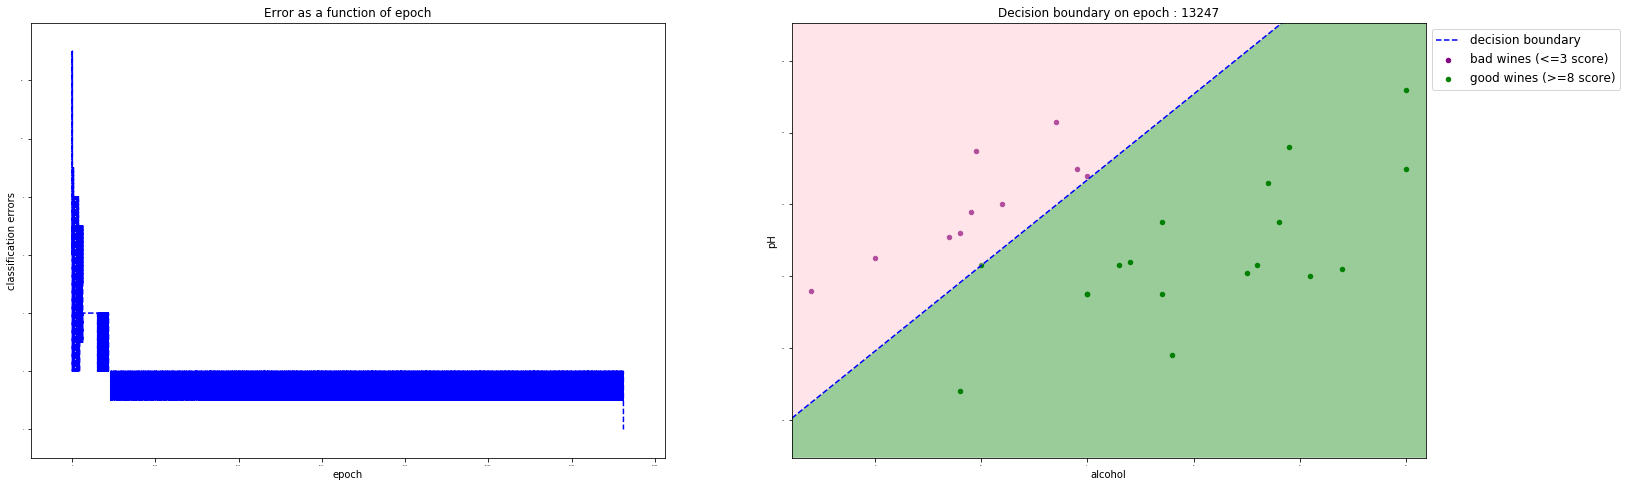

In [6]:
"""Returns the min, max for the x_axis, y_axis of our wine_data - in this case, alcohol and pH respectively"""
"""Function 'x_y_bounds' takes the x_axis, and y_axis wine_data array of values"""
"""Returns a tuple - see return line"""
def x_y_bounds(x_axis, y_axis, wine_data):
    x_data = [x_val for x_val in wine_data[x_axis]]
    y_data = [y_val for y_val in wine_data[y_axis]]
    x_min, x_max = min(x_data), max(x_data)
    y_min, y_max = min(y_data), max(y_data)
    return (([x_min, x_max], [y_min, y_max]))

"""Function 'setup_plot' is a helper function to decrease repetitiveness of main function below"""
"""Sets title, x_label, and y_label, returning this modified plot"""
def setup_plot(plot, title, x_label, y_label):
    plot.set_title(title)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    return plot

"""Function 'plot_performance' takes in tuple from Perceptron learning function"""
"""wine_data parameter - contains x_axis, y_axis, and quality column"""
"""good_thresh, bad_thresh parameter - represents data of interest from quality column"""
"""epoch parameter - Default -1 value to plot until epoch specified in Perceptron model, else only until
specified epoch"""
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    
    """Get performance data from a specific epoch"""
    def extract(index):
        return [itr[index] for itr in performance]

    
    """Derived point slope equation for plotting decision boundary"""
    def y_val_decision_boundary(x, weight1, weight2, bias):
        return (-weight1 / weight2) * x + (-bias / weight2)

    
    """Declare variables within this function to represent our collected data"""
    """Also include ones for plot title, x and y axis labels"""
    cols = wine_data.columns
    x_axis, y_axis, compare = cols[0], cols[1], cols[2]
    epo_vs_error_title = 'Error as a function of epoch'
    e_vs_e_x_title, e_vs_e_y_title = 'epoch', 'classification errors'
    decision_boundary_title = 'Decision boundary on epoch'
    epochs, errors, weights, bias = extract(0), extract(1), extract(2), extract(3)
    epoch_choice = epoch if (epoch > 0 and epoch < len(performance)) else len(performance)

    
    """Setup first plot - Classification Error vs Epoch"""
    fig, plot = plt.subplots(1, 2, figsize=(25, 8))
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    epoch_vs_error = setup_plot(plot[0], epo_vs_error_title, e_vs_e_x_title, e_vs_e_y_title)
    x_param_vs_y_param = setup_plot(plot[1], decision_boundary_title + " : " + str(epoch_choice), x_axis, y_axis)
    
    
    """Set x_axis and y_axis limits dynamically by finding their max values, and multiplying by percentage"""
    epoch_buffer, errors_buffer = max(epochs) * 0.075, max(errors) * 0.075
    plot[0].set(xlim=(min(epochs) - epoch_buffer, max(epochs) + epoch_buffer), ylim=(min(errors) - errors_buffer, max(errors) + errors_buffer))
    plot[0].plot(epochs[:epoch_choice], errors[:epoch_choice], 'b--')

    
    """Create variables to keep track of weights, and bias"""
    b = bias[epoch_choice - 1]
    weight1 = weights[epoch_choice - 1][0]
    weight2 = weights[epoch_choice - 1][1]

    
    """Separate bad wine and good wine into their own datasets"""
    bad_wine = (wine_data[wine_data[compare] <= bad_thresh])[[x_axis, y_axis]]
    good_wine = (wine_data[wine_data[compare] >= good_thresh])[[x_axis, y_axis]]
    
    
    """Set the x_axis, y_axis boundaries"""
    """Calls 'x_y_bounds' function from above to determine those limits"""
    axis_bounds = x_y_bounds(x_axis, y_axis, wine_data)
    x_decision_boundary = [i for i in range(-20, 20)]
    y_decision_boundary = [y_val_decision_boundary(i, weight2, weight1, b) for i in range(-20, 20)]
    
    
    """Add additional buffers - extend limit on x_axis, y_axis"""
    axis_buffer = 0.05 * min(axis_bounds[0][1], axis_bounds[1][1])
    plot[1].set(xlim=(axis_bounds[0][0] - axis_buffer, axis_bounds[0][1] + axis_buffer), ylim=(axis_bounds[1][0] - axis_buffer, axis_bounds[1][1] + axis_buffer))
    decision_boundary = plot[1].plot(x_decision_boundary, y_decision_boundary, 'b--')
    
    
    """Plot the bad and good wine with two separate calls to scatter"""
    bad_wine_plot = plot[1].scatter(bad_wine[x_axis], bad_wine[y_axis], s=20, c='purple')
    good_wine_plot = plot[1].scatter(good_wine[x_axis], good_wine[y_axis], s=20, c='green')
    
    
    """Use fill_between method to color two regions based on decision boundary"""
    plot[1].fill_between(x_decision_boundary, axis_bounds[1][0] - axis_buffer, y_decision_boundary, facecolor='green', alpha=0.4)
    plot[1].fill_between(x_decision_boundary, axis_bounds[1][1] + axis_buffer, y_decision_boundary, facecolor='pink', alpha=0.4)

    
    """Create legend on right of second plot"""
    plot[1].legend(['decision boundary' , 'bad wines (<=' + str(bad_thresh) + ' score)', 'good wines (>=' + str(good_thresh) + ' score)'], loc='upper left', bbox_to_anchor=(1,1), prop={'size':12})
    
    
    """Choice to save plot, if last parameter of plot_performance function is == True"""
    if save_plot == True:
        plt.savefig("perceptron_plot_performance.png")

    plt.show()

plot_performance(perceptron_training, updated_data[['alcohol', 'pH', 'quality']], 8, 3, 15000, True)

## d) Feature Scaling - Modifications to Data for Faster Convergence
<br>

**Our data takes around 13,000 epochs to converge, even with a learning rate of 0.9 (max 1.0).**
<br>

**To reach our decision boundary faster, we can normalize our data to lie within a certain range**
<br>

**There are multiple different statistical methods to achieve this, such as standardization**
<br>

**For our data, we will use mean normalization**

       alcohol        pH  quality  Good
267   0.262436  0.042942        8     1
278   0.226722 -0.099915        8     1
390   0.280293  0.292942        8     1
440  -0.273278 -0.516582        8     1
455   0.369579 -0.111820        8     1
459  -0.416135 -0.076105        3     0
481   0.066008 -0.195153        8     1
495  -0.058992 -0.195153        8     1
498  -0.058992 -0.195153        8     1
517  -0.523278 -0.183248        3     0
588   0.476722  0.483418        8     1
690  -0.112564  0.376276        3     0
828   0.244579  0.173895        8     1
832  -0.255421  0.078656        3     0
899  -0.058992  0.197704        3     0
1061  0.208865 -0.123724        8     1
1090  0.083865 -0.397534        8     1
1120  0.316008 -0.135629        8     1
1202  0.066008  0.042942        8     1
1269  0.476722  0.221514        8     1
1299 -0.076849  0.221514        3     0
1374 -0.273278  0.007228        3     0
1403 -0.237564 -0.099915        8     1
1449 -0.005421 -0.099915        8     1


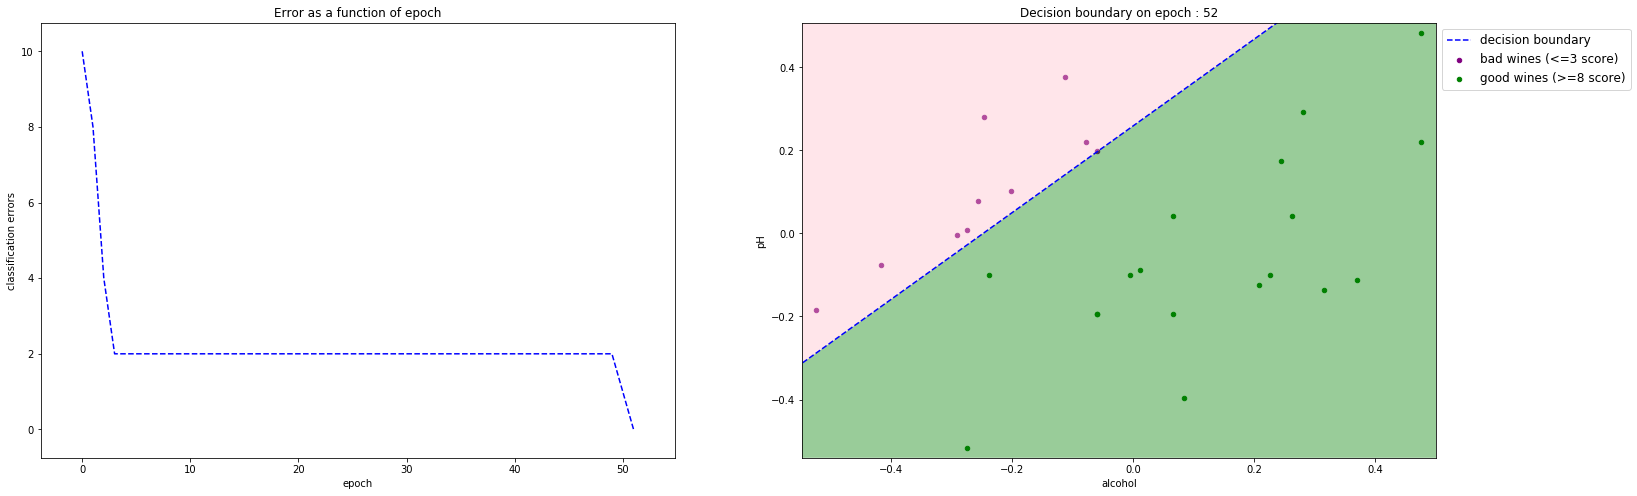

In [7]:
def average(data):
    return sum(data) / len(data)

def mean_normalization(num, data, average):
    return (num - average) / (max(data.values) - min(data.values))

def with_feature_scaling(updated_data):
    x_axis, y_axis = 'alcohol', 'pH'

    graph_data = updated_data[[x_axis, y_axis, 'quality', 'Good']]

    x_axis_avg = average(updated_data[x_axis].values)
    y_axis_avg = average(updated_data[y_axis].values)
    
    x_norm = [mean_normalization(x, graph_data[x_axis], x_axis_avg) for x in graph_data[x_axis]]
    graph_data = graph_data.assign(alcohol = x_norm)
    
    y_norm = [mean_normalization(y, graph_data[y_axis], y_axis_avg) for y in graph_data[y_axis]]
    graph_data = graph_data.assign(pH = y_norm)

    return graph_data

normalized_data = with_feature_scaling(updated_data)
print(normalized_data[['alcohol', 'pH', 'quality', 'Good']])

n_red_wine_perceptron = Perceptron(normalized_data[['pH', 'alcohol']], 0.9, 0)
n_perceptron_training = n_red_wine_perceptron.rosenblatt_learning(normalized_data['Good'])
plot_performance(n_perceptron_training, normalized_data[['alcohol', 'pH', 'quality']], 8, 3, 15000, True)

**The mean normalized data allows the Perceptron to converge to 0 errors after approximately 50 epochs.**
<br>

**To keep our models consistent, the Perceptron is trained with a learning rate of 0.9.** 

# V.3 My fair ADALINE

## a) Training our Perceptron with a larger range of Quality

**A single perceptron can converge on a decision boundary, if our data is linearly separable.**
<br>

**By setting our quality threshold to cover a wider range of data, specifically wines with a score of 4, and with a score of 7 and higher, the perceptron cannot correctly train.**
<br>

**Our data points for these values overlap, making a separable linear boundary not possible.**

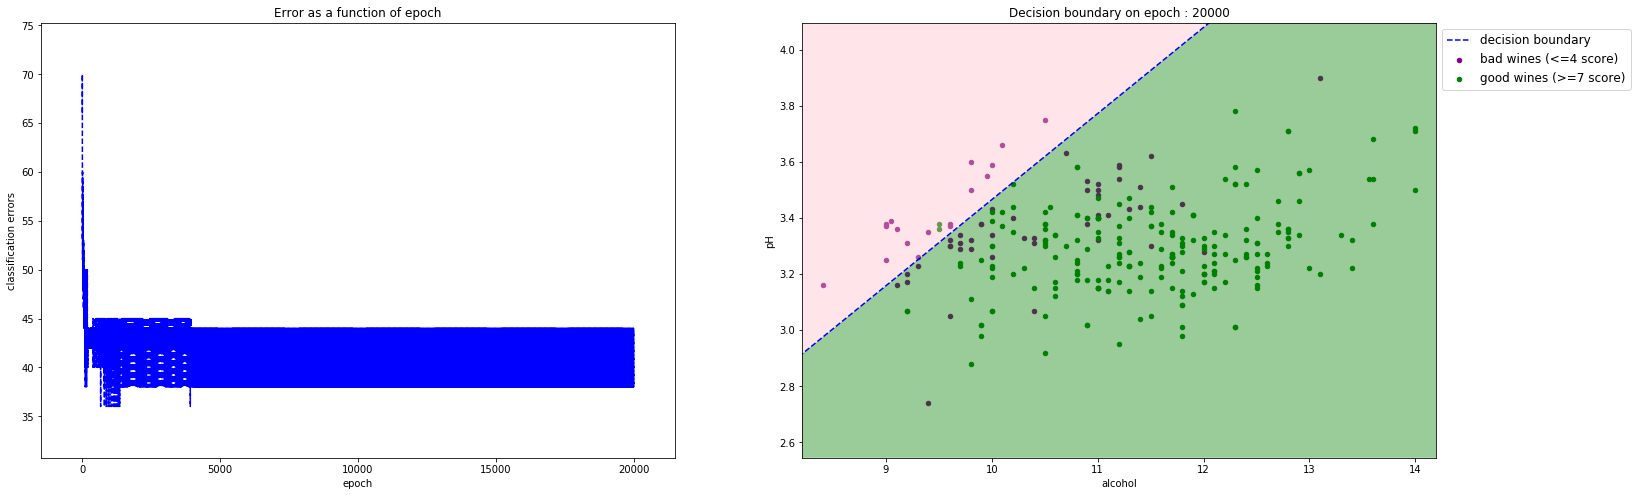

In [8]:
lq_updated_data = add_qlty_column(data, 7, 4)

lq_red_wine_perceptron = Perceptron(lq_updated_data[['pH', 'alcohol']], 0.9, 20000)
lq_perceptron_training = lq_red_wine_perceptron.rosenblatt_learning(lq_updated_data['Good'])
plot_performance(lq_perceptron_training, lq_updated_data[['alcohol', 'pH', 'quality']], 7, 4, 20000, True)


**Even after 20,000 epochs, the Perceptron does not find an optimal solution for the decision boundary.**
<br>

**After the first several 10 epochs, the decision boundary oscillates between 35 and 45 classification errors.**
<br>

**At this point, we should find a better model to handle this larger dataset.**


## b) Creating an ADAptive LInear NEuron (ADALINE).  The initial setup.

**The ADALINE model is based on minimizing the error across all values in a dataset.**

**Using either batch or online learning, and a process called gradient descent, we can reach the optimal decision boundary.**

**With a high level of accuracy, we can classify good and bad wine.**
<br>
<br>

**To start off, the ADALINE is different from its Perceptron counterpart in the activation function used.**

**Depending on the dataset, we can use a non-linear activation function.  For now, we will focus on the identity function (returns the same value as the weighted sum).**

**As the quantizer, we will use the Heaviside Step Activation function. (returns 1 if >= 0, else -1).**

**The Widrow-Hoff Learning Rule involves computing the Delta (the difference between our desired outcome and weighted sum output), and updating our weights/bias accordingly.**
<br>
<br>

**In addition to creating our ADALINE, we should also create functions that will perform matrix/vector calculations.  This includes matrix vector multiplication, and other scalar by vector operations.**

In [9]:
def vector_op(v1, v2, op):
    ops = {
        "+" : lambda x, y : x + y,
        "-" : lambda x, y : x - y,
        "*" : lambda x, y : x * y,
        "/" : lambda x, y : x / y
    }
    return [ops[op](num1,num2) for num1, num2 in zip(v1, v2)]

def dot_product(matrix, vector):
    sums = []
    for i in range(len(matrix)):
        weighted_sum = 0
        for j in range(len(vector)):
            weighted_sum += matrix[i][j] * vector[j]
        sums.append(weighted_sum)
    return sums
        
class Adaline():
    def __init__(self, data):
        self.data = data

    def linear_activation(self, activation):
        return activation

    def net_input(self, params):
        bias_vector = [self.bias] * len(params)
        return vector_op(dot_product(params, self.weights), bias_vector, "+")

    def widrow_hoff_learning(self, cmp_data):
        random.seed(9000)
        self.costs = []
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)) - 1)]

        for i in range(100):
            output = [self.linear_activation(samples) for samples in self.net_input(self.data.values)]
            errors = vector_subtract(cmp_data.values, output)
            self.weights += dot_product(self.data.values, errors)
            self.bias += sum(errors)

    def predict():
        return [1 if result >= 0 else -1 for result in self.net_input(self.data.values)]

## c) Training our ADALINE.  Online vs Batch Training

**Updating our ADALINE class above, adding an epoch and learning rate parameter, amongst integrating an option for online or batch learning, the new declaration is as follows...**

**Additional linear algebra based functions have been added**

In [10]:
def transpose(matrix, row_size):
    t = []
    for i in range(row_size):
        t.append([row[i] for row in matrix])
    return t

class Adaline():
    def __init__(self, data, epochs, learning_rate, batch=False):
        self.data = data
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch = batch

    def linear_activation(self, activation):
        return activation

    def net_input(self, params):
        bias_vector = [self.bias] * len(params)
        return vector_op(dot_product(params, self.weights), bias_vector, "+")

    def calc_errors(self, cmp_data, output):
        errors = 0
        for i in range(len(cmp_data)):
            if cmp_data[i] != output[i]:
                errors += 1
        return errors

    def online_learning(self, cmp_data, epoch):
        for x, y_true in zip(self.data.values, cmp_data):
            output = self.net_input([x])
            error = y_true - output[0]
            self.weights = vector_op(self.weights, vector_op([self.learning_rate * error] * len(self.weights), x, "*"), "+")
            self.bias += self.learning_rate * error
        performance = (epoch, self.calc_errors(cmp_data.values, self.predict()), self.weights, self.bias)
        self.performance.append(performance)

    def batch_learning(self, cmp_data, epoch):
        output = [self.linear_activation(samples) for samples in self.net_input(self.data.values)]
        errors = vector_op(cmp_data.values, output, "-")
        self.weights = vector_op(self.weights, vector_op([self.learning_rate] * 2, dot_product(transpose(self.data.values, 2), errors), "*"), "+")
        self.bias += self.learning_rate * sum(errors)
        performance = (epoch, self.calc_errors(cmp_data.values, self.predict()), self.weights, self.bias)
        self.performance.append(performance)
        

    def widrow_hoff_learning(self, cmp_data):
        random.seed(9000)
        self.performance = []
        self.costs = []
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)))]
        for i in infinity() if self.epochs == 0 else range(self.epochs):
            if self.batch == True:
                self.batch_learning(cmp_data, i)
                
            else:
                self.online_learning(cmp_data, i)

    def predict(self):
        return [1 if result >= 0 else -1 for result in self.net_input(self.data.values)]

## d) The best Learning Rate?  Choice by observation

**For the ADALINE model, the learning rate has a very significant impact on convergence.**

**Because the accumulated error (sum) is multiplied by the learning rate to adjust the weight/bias, our chosen value for learning rate can cause our numbers to blow up to infinity, or cause the model to train too slowly.**

**We can determine the best learning rate by plotting our graphs, and changing its magnitude by a factor of 10.**

**The following are plots of an ADALINE trained with batch learning.**

In [11]:
"""Filtering the data, similar to how it was done for the Perceptron above"""

"""Normalization was performed to promote faster convergence"""

def adaline_qlty_column(good_threshold, bad_threshold):
    adaline_data = data.assign(Good=[1 if qlty >= good_threshold else -1 if qlty <= bad_threshold else 0 for qlty in data['quality']])
    adaline_threshold_filter = (adaline_data['quality'] >= good_threshold) | (adaline_data['quality'] <= bad_threshold)
    adaline_data = adaline_data[adaline_threshold_filter]

    x_axis_avg = average(adaline_data['alcohol'].values)
    y_axis_avg = average(adaline_data['pH'].values)

    x_axis_norm = [mean_normalization(x, adaline_data['alcohol'], x_axis_avg) for x in adaline_data['alcohol']]
    y_axis_norm = [mean_normalization(y, adaline_data['pH'], y_axis_avg) for y in adaline_data['pH']]

    adaline_data = adaline_data.assign(alcohol=x_axis_norm)
    adaline_data = adaline_data.assign(pH=y_axis_norm)
    
    return adaline_data

adaline_data = adaline_qlty_column(7, 4)

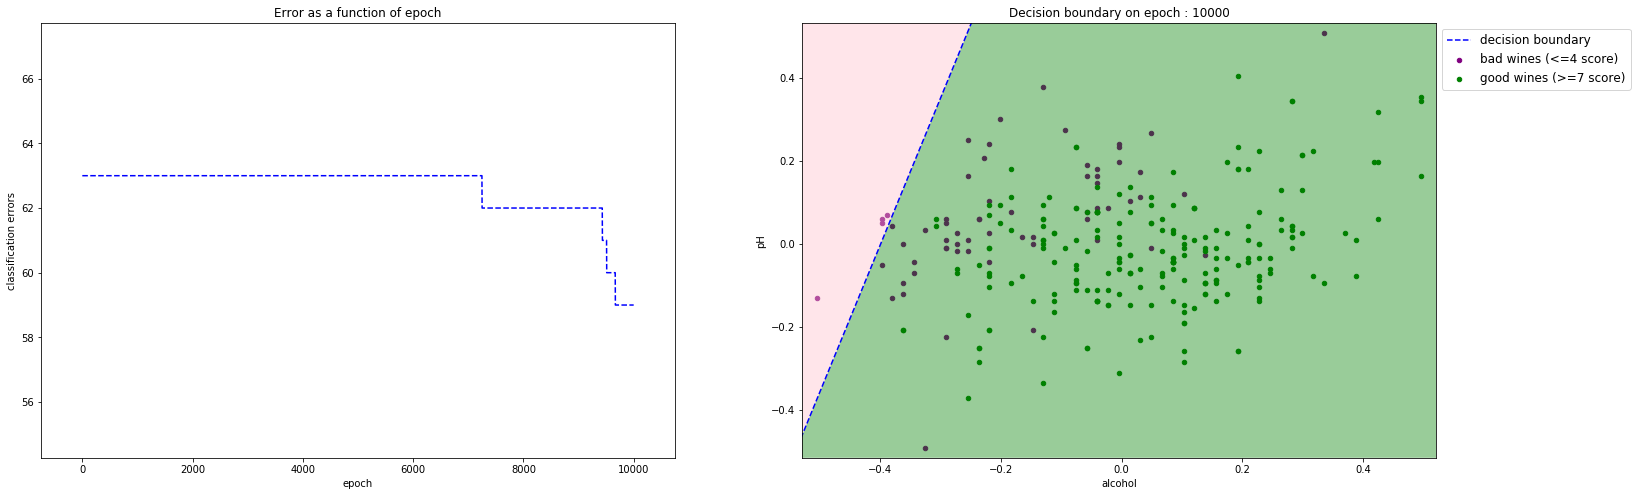

In [12]:
"""Learning Rate : 0.00001"""

adaline00001 = Adaline(adaline_data[['pH', 'alcohol']], 10000, 0.00001, True)
adaline00001.widrow_hoff_learning(adaline_data['Good'])

plot_performance(adaline00001.performance, adaline_data[['alcohol', 'pH', 'quality']], 7, 4, 0, False)

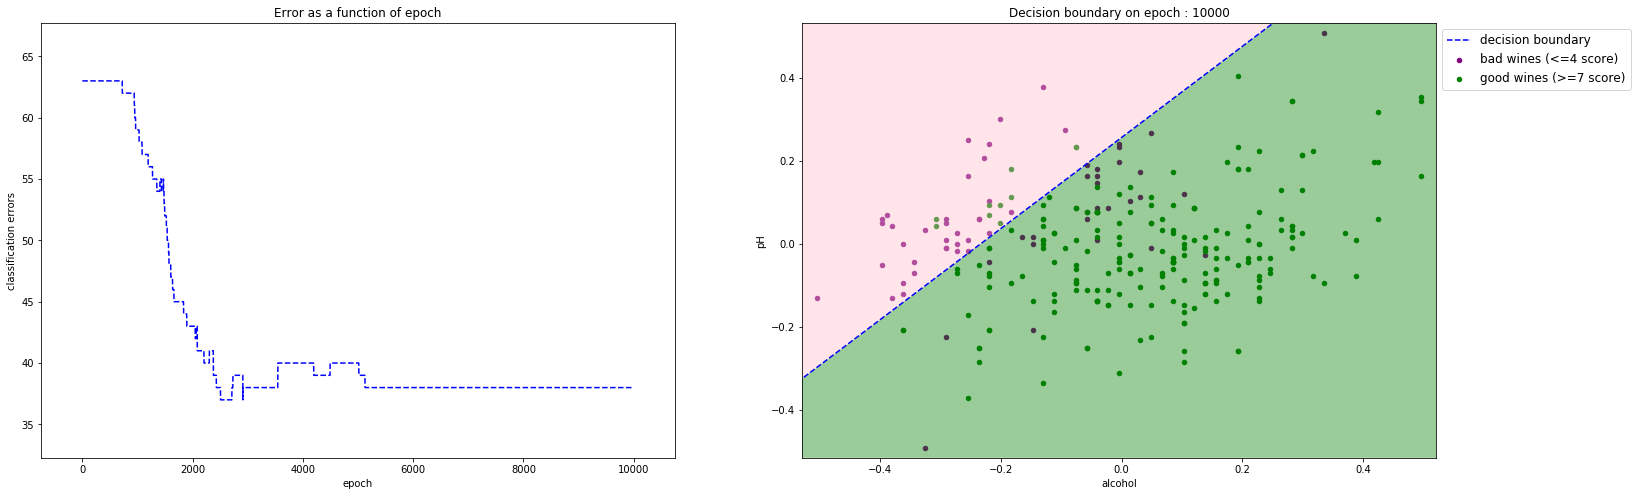

In [13]:
"""Learning Rate : 0.0001"""

adaline0001 = Adaline(adaline_data[['pH', 'alcohol']], 10000, 0.0001, True)
adaline0001.widrow_hoff_learning(adaline_data['Good'])

plot_performance(adaline0001.performance, adaline_data[['alcohol', 'pH', 'quality']], 7, 4, 0, False)

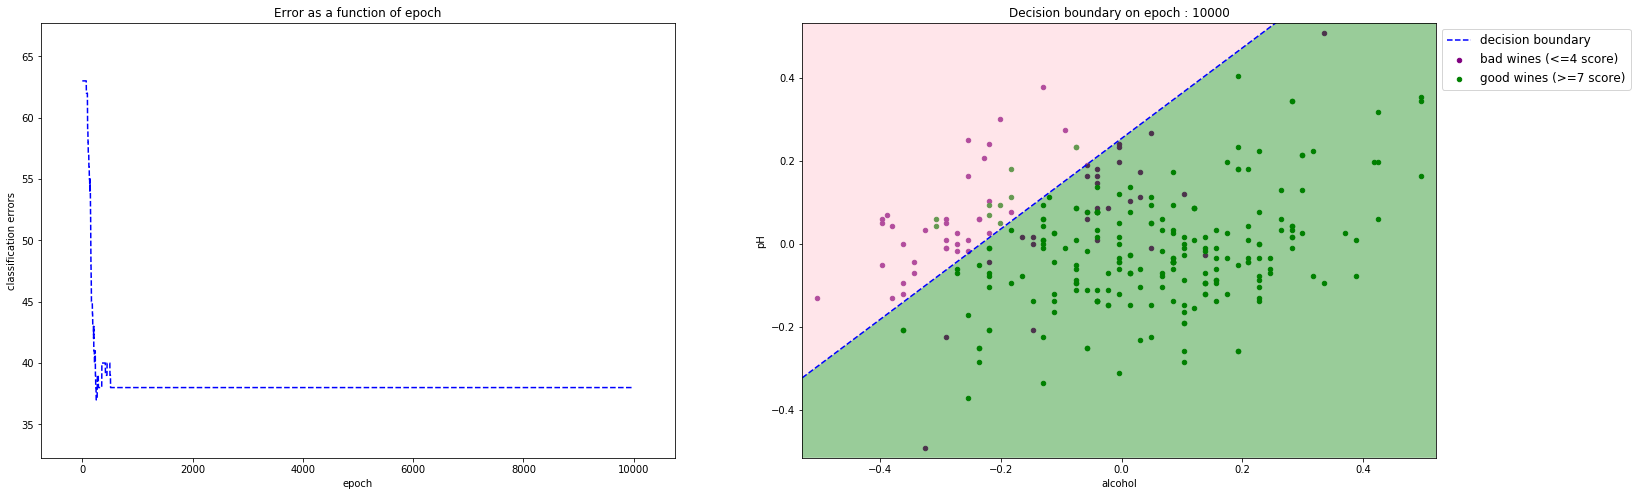

In [14]:
"""Learning Rate : 0.001"""

adaline001 = Adaline(adaline_data[['pH', 'alcohol']], 10000, 0.001, True)
adaline001.widrow_hoff_learning(adaline_data['Good'])

plot_performance(adaline001.performance, adaline_data[['alcohol', 'pH', 'quality']], 7, 4, 0, False)

**Keeping all parameters constant aside from the learning rate, it seems that a value of 0.001 is the best for this model.**

**As shown above, a learning rate of 0.00001 trains too slowly.  Even after 10,000 epochs, the amount of classification errors is relatively too high.**

**On the contrary, a learning rate of 0.0001 does a significantly better job.  It takes approximately 5,000 epochs to settle out.**

**With learning rate == 0.001, the model converges at less than 1,000 epochs.**

**A larger learning rate will cause the model's values to blow up to infinity.**
<br>
<br>
<br>


**For a comparison between batch and online learning, we train the ADALINE model with an even more difficult dataset (good_thresh >= 6, and bad_threshold <= 5).**

**See the following two sets of plots below.**

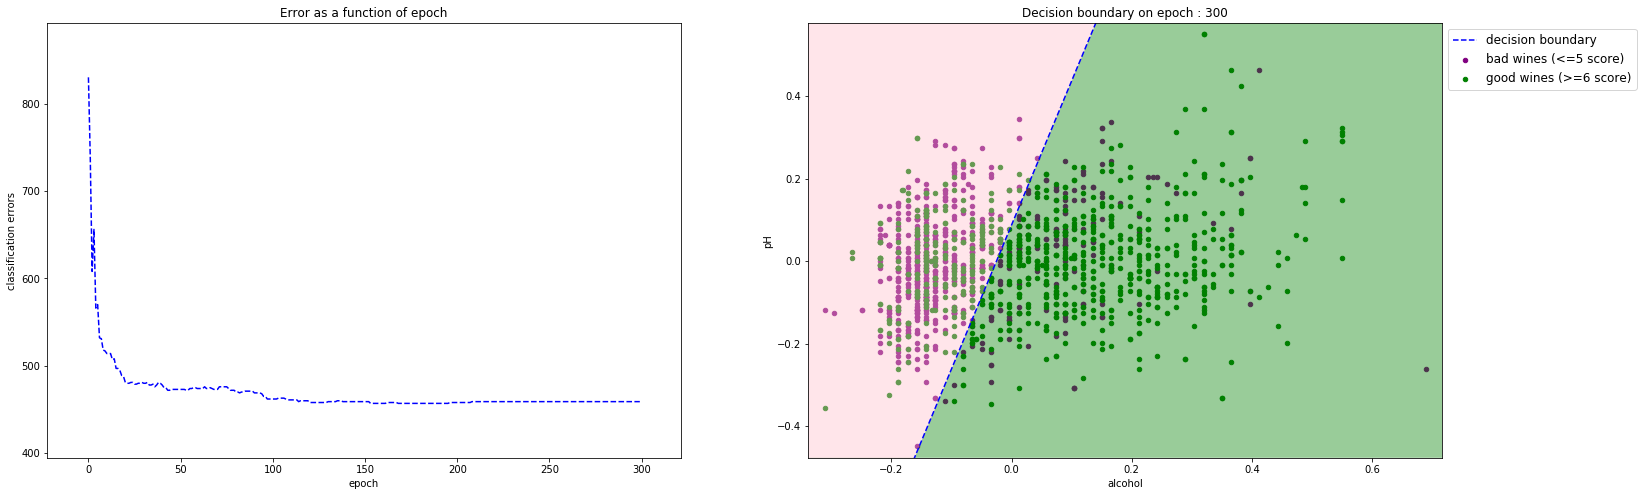

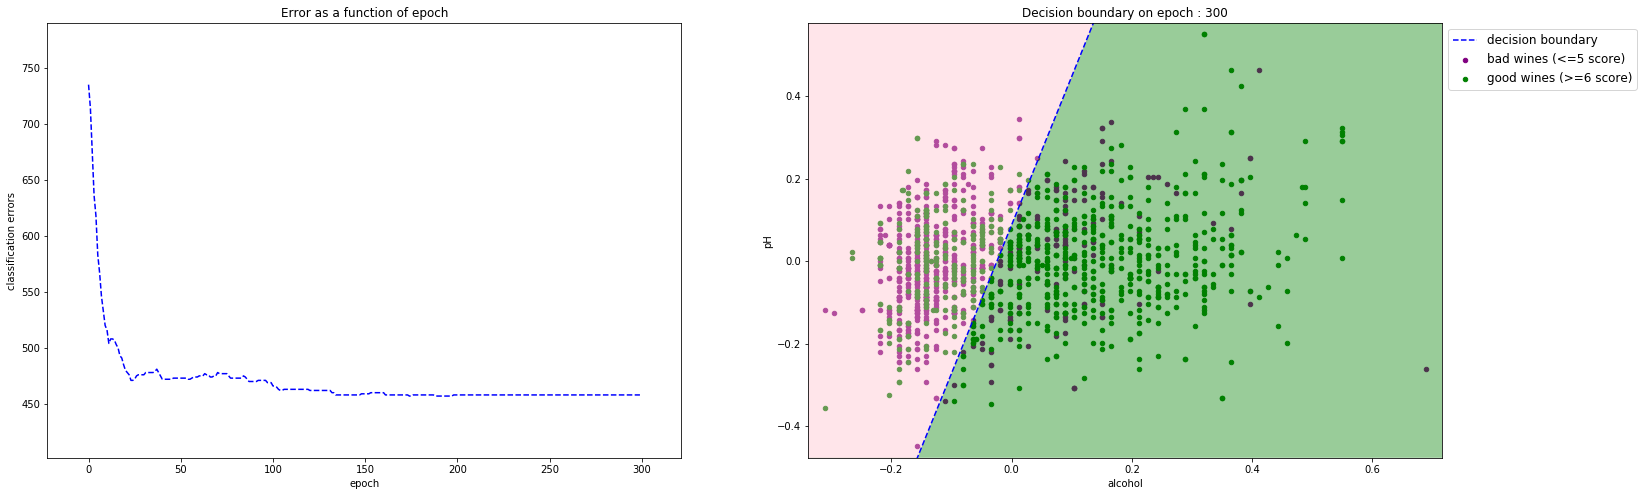

In [15]:
"""Learning Rate : 0.001, but now with online training"""
"""First plot is batch training; second plot is online learning"""

lq_adaline_data = adaline_qlty_column(6, 5)

lq_adaline0001 = Adaline(lq_adaline_data[['pH', 'alcohol']], 300, 0.001, True)
lq_adaline0001.widrow_hoff_learning(lq_adaline_data['Good'])

lq_adaline0001_online = Adaline(lq_adaline_data[['pH', 'alcohol']], 300, 0.001, False)
lq_adaline0001_online.widrow_hoff_learning(lq_adaline_data['Good'])

plot_performance(lq_adaline0001.performance, lq_adaline_data[['alcohol', 'pH', 'quality']], 6, 5, 0, False)
plot_performance(lq_adaline0001_online.performance, lq_adaline_data[['alcohol', 'pH', 'quality']], 6, 5, 0, False)

# V.4 Advanced wine sampling and resampling

## a) Validation through the Holdout Method

**To evaluate our model, we should be able to determine its accuracy - that is ratio of classification errors to total samples.**

**We can perform this kind of validation using a method called the holdout method.**

**The holdout method splits our entire dataset (in our case the DataFrame) for training and validation.**
<br>

**A function for this is created as follows, returning a tuple in the following format.**

(training_pandas_dataframe, validation_pandas_dataframe)

In [16]:
def holdout(data, ratio=0.8):
    df_training = data.sample(frac=0.8)
    df_validation = data.loc[~data.index.isin(df_training.index)]
    return (df_training, df_validation)

for df in holdout(lq_adaline_data[['alcohol', 'pH', 'quality']]):
    print(df)

       alcohol        pH  quality
497   0.104156  0.006997        5
293  -0.049690  0.077864        6
582  -0.188151 -0.095365        5
381  -0.065074 -0.197727        6
1395 -0.134305 -0.000877        6
...        ...       ...      ...
99   -0.218920 -0.008751        6
144   0.550310  0.290462        6
951   0.304156 -0.040247        7
1241 -0.095844 -0.118987        5
166  -0.034305  0.022746        5

[1279 rows x 3 columns]
       alcohol        pH  quality
1    -0.095844 -0.087491        5
5    -0.157382  0.156604        5
7    -0.065074  0.062116        7
12   -0.080459  0.211722        5
29   -0.095844  0.054242        6
...        ...       ...      ...
1568 -0.188151  0.022746        5
1572 -0.141997  0.014871        5
1586  0.150310  0.022746        6
1596  0.088772  0.085738        6
1598  0.088772  0.062116        6

[320 rows x 3 columns]


**With a training data sample of 0.8 of the original, we can apply our ADALINE model to it, while assessing the validity of our decision boundary equation against our evaluation set.**

**First, start off by plotting the results of ADALINE training and then using the decision boundary line equation to create a separate plot with the evaluation set.**

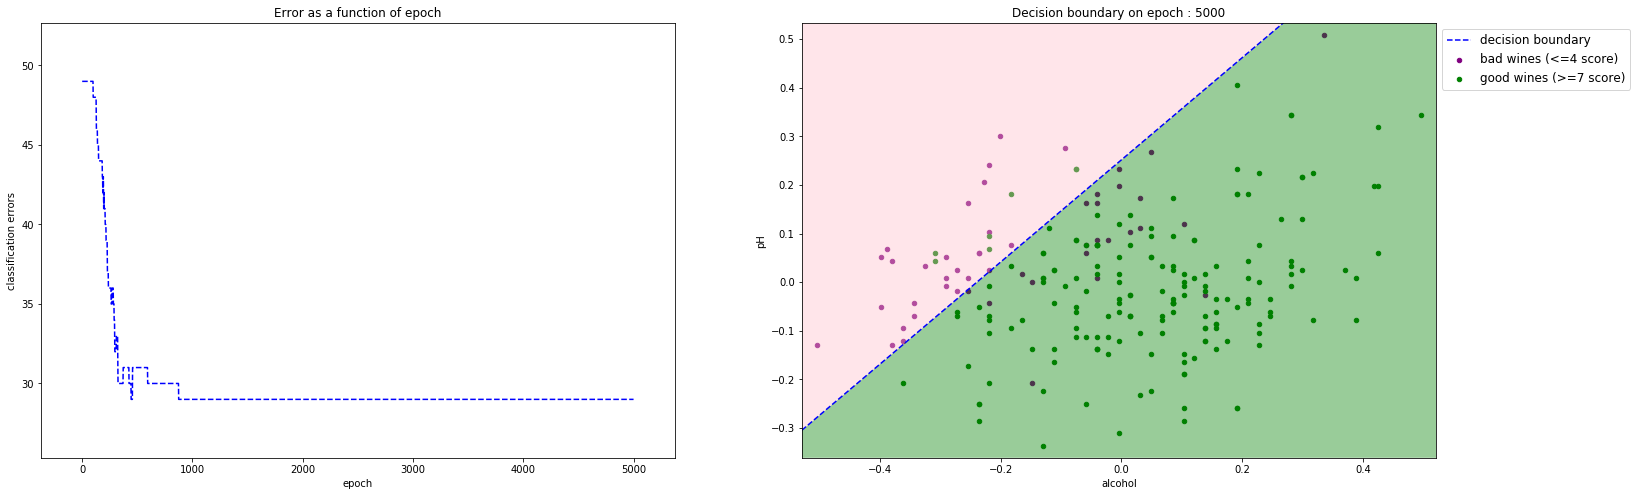

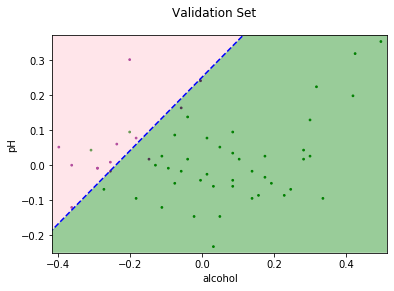

In [17]:
holdout_red_wine_train = holdout(adaline_data)[0][['alcohol', 'pH', 'quality', 'Good']]
holdout_red_wine_eval = holdout(adaline_data)[1][['alcohol', 'pH', 'quality', 'Good']]

holdout_adaline = Adaline(holdout_red_wine_train[['pH', 'alcohol']], 5000, 0.001, True)
holdout_adaline.widrow_hoff_learning(holdout_red_wine_train['Good'])

plot_performance(holdout_adaline.performance, holdout_red_wine_train[['alcohol', 'pH', 'quality']], 7, 4, 0, False)

train_results = holdout_adaline.performance[len(holdout_adaline.performance) - 1]

def validation_plot(train_performance, eval_data, good_threshold, bad_threshold):
    
    def y_val_decision_boundary(x, weight1, weight2, bias):
        return (-weight1 / weight2) * x + (-bias / weight2)
    
    cols = eval_data.columns
    x_label, y_label = cols[0], cols[1]
    plt.suptitle('Validation Set')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    weight1, weight2, b = train_performance[2][0], train_performance[2][1], train_performance[3]
    axis_bounds = x_y_bounds(x_label, y_label, eval_data)
    x_decision_boundary = [i for i in range(-20, 20)]
    y_decision_boundary = [y_val_decision_boundary(i, weight2, weight1, b) for i in range(-20, 20)]
    
    axis_buffer = 0.05 * min(axis_bounds[0][1], axis_bounds[1][1])
    plt.xlim(axis_bounds[0][0] - axis_buffer, axis_bounds[0][1] + axis_buffer)
    plt.ylim(axis_bounds[1][0] - axis_buffer, axis_bounds[1][1] + axis_buffer)
    decision_boundary = plt.plot(x_decision_boundary, y_decision_boundary, 'b--')
    
    colors = ['green' if qlty >= good_threshold else 'purple' for qlty in eval_data['quality']]
    size = [3 if qlty >= good_threshold else 3 if qlty <= bad_threshold else 0 for qlty in eval_data['quality']]
    plt.scatter(eval_data[x_label], eval_data[y_label], s=size, c=colors)
    
    plt.fill_between(x_decision_boundary, axis_bounds[1][0] - axis_buffer, y_decision_boundary, facecolor='green', alpha=0.4)
    plt.fill_between(x_decision_boundary, axis_bounds[1][1] + axis_buffer, y_decision_boundary, facecolor='pink', alpha=0.4)
    
    plt.show()

validation_plot(train_results, holdout_red_wine_eval, 7, 4)

**Our holdout tuple, separated as variables into training and evaluation DF sets are also printed below.**

In [18]:
print("""Training Set""")
print(holdout_red_wine_train)
print("""\n\n\n""")

print("""Evaluation Set""")
print(holdout_red_wine_eval)
print("""\n\n\n""")

Training Set
       alcohol        pH  quality  Good
41   -0.343761 -0.043319        4    -1
1239  0.102668  0.120474        4    -1
453  -0.004475 -0.043319        7     1
874   0.102668 -0.164009        7     1
1363 -0.254475 -0.017457        4    -1
...        ...       ...      ...   ...
538   0.138382 -0.095043        7     1
281  -0.236618 -0.051940        7     1
513   0.102668 -0.189871        7     1
1468 -0.218761 -0.008836        7     1
459  -0.397332 -0.051940        3    -1

[224 rows x 4 columns]




Evaluation Set
       alcohol        pH  quality  Good
8    -0.308046  0.042888        7     1
37   -0.272332 -0.069181        7     1
73   -0.361618 -0.000216        4    -1
161  -0.361618 -0.120905        4    -1
167  -0.397332  0.051509        4    -1
198   0.316954  0.223922        7     1
209  -0.129475 -0.000216        7     1
265  -0.183046 -0.095043        7     1
278   0.245525 -0.069181        8     1
290  -0.111618  0.025647        7     1
320   0.049097  0.051509

**To assess the accuracy of our holdout method on the ADALINE model, we create a function to determine how many classification errors the decision boundary has for the validation set.**
<br>


In [33]:
def accuracy(train_results, eval_set):
    def classifier(num):
        return 1 if num >= 0 else -1
    
    errors = 0
    cols = eval_set.columns
    x_label, y_label, cmp = cols[0], cols[1], cols[3]
    weight1, weight2, bias = train_results[2][0], train_results[2][1], train_results[3]
    
    for i in range(len(eval_set)):
        if classifier(list(eval_set[x_label])[i] * weight2 + list(eval_set[y_label])[i] * weight1 + bias) != list(eval_set[cmp])[i]:
            errors += 1
    accuracy = (len(eval_set) - errors) / len(eval_set)
    return accuracy * 100

kfold_accuracy = accuracy(train_results, holdout_red_wine_eval)
print("kFold Accuracy : %.2f" % (kfold_accuracy))

kFold Accuracy : 89.29


**Our kFold Accuracy (shown above) is relatively high, which is not bad considering we are using a strictly linear decision boundary to separate/classify our data.**

## b) k-fold Cross Validation

**Instead of splitting our data into two sets, partitioning them by a specific ratio or percentage, we will use another method for validation.**

**The k-fold cross-validation is a technique to assess our Machine Learning model.**

**k-fold splits the data into k-groups, with an option to shuffle data before creating the groups/folds.**

**For each fold, we will assign (total data points / folds) as the amount for the validation set in each fold.**

**The remaining data points for each fold will be our training set.**

**For example, if our dataset was**
<br>

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
<br>

**then a 3 k-fold sample would look like this...**

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
<br>
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
<br>
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]
<br>


In [20]:
def k_fold(data, k=5, shuffle=True):
    if shuffle == True:
        data = data.sample(frac=1)
    folds = []
    for i in range(k):
        validation = data[round((i / k) * len(data)): round((i + 1) / k * len(data))]
        training = data.loc[~data.index.isin(validation.index)]
        fold = (training, validation)
        folds.append(fold)
    return folds

k_fold_red_wine = k_fold(adaline_data[['alcohol', 'pH', 'quality', 'Good']])

## c) k-fold Relationship with our Data

**We have applied our k_fold function to our adaline data, specifically for qualities >= 7, and qualities <= 4.**

**Now, let's train and validate each fold using our ADALINE model.**

**First, we write a function to parse through the folds, obtain our data, and use our validation_plot function from above.**

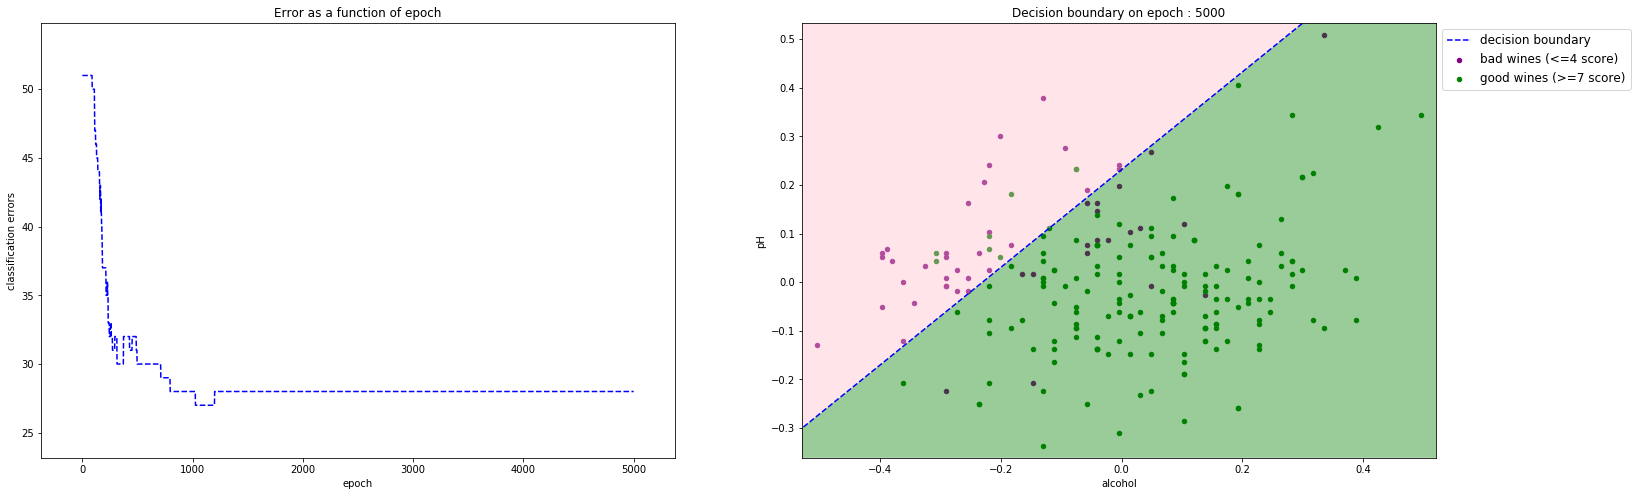

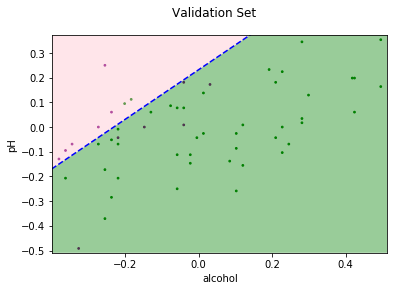

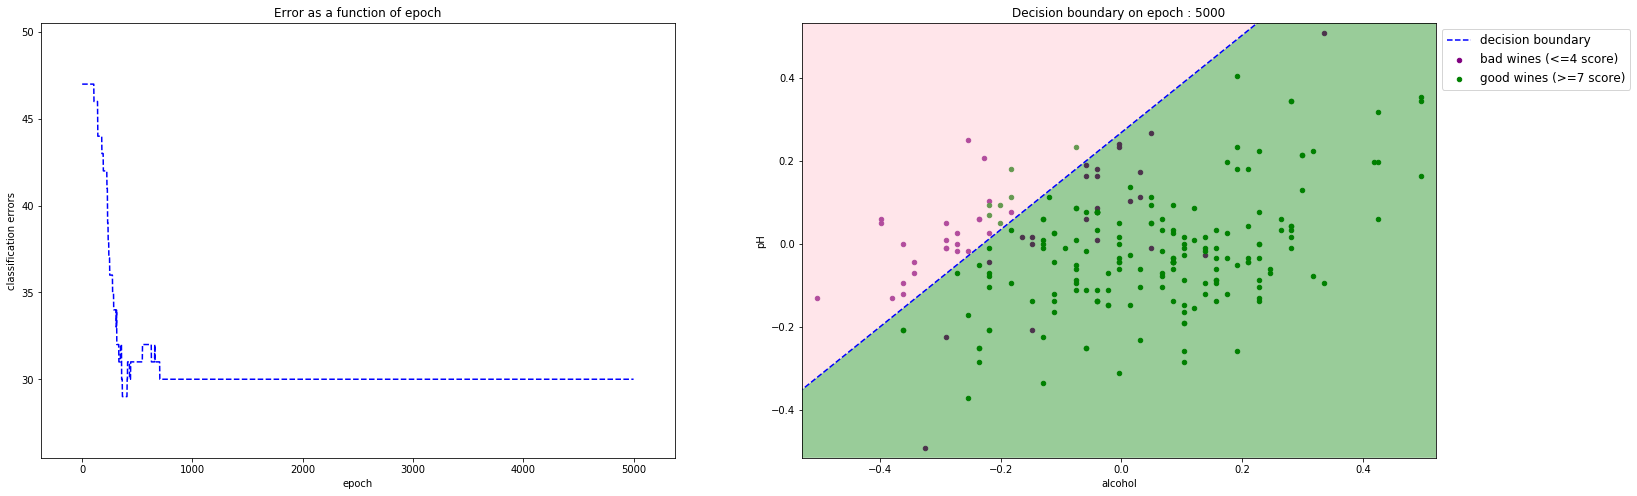

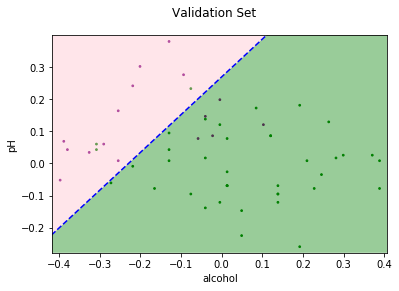

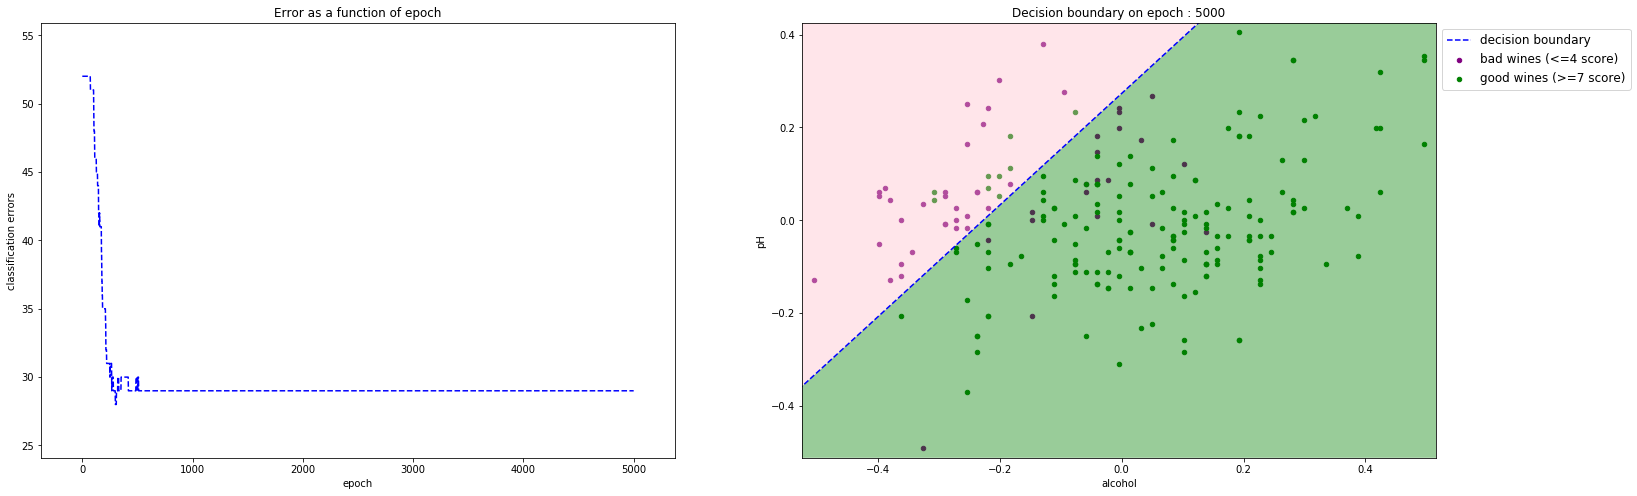

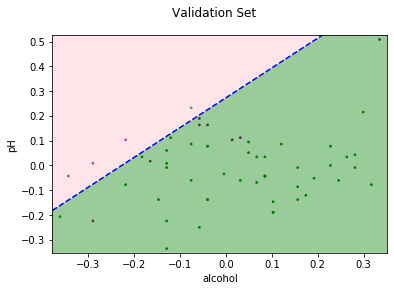

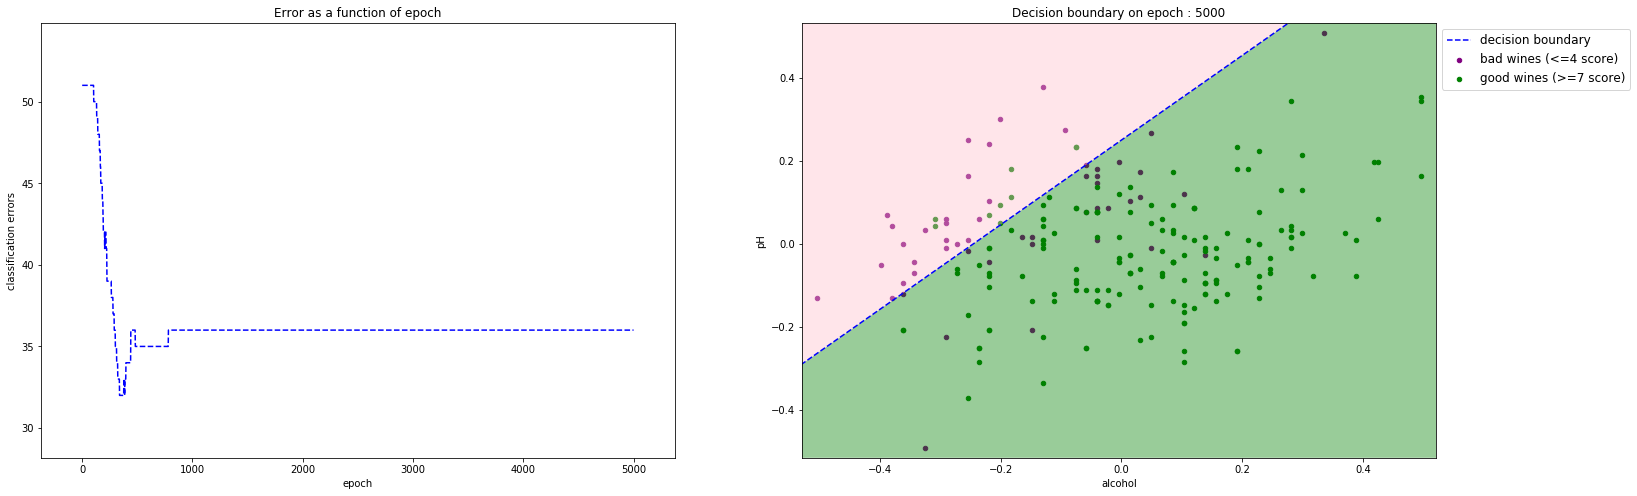

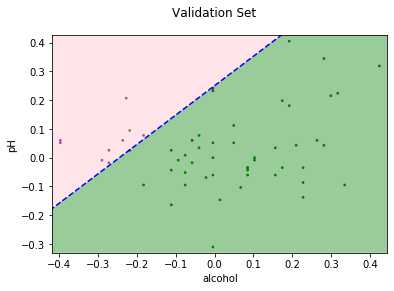

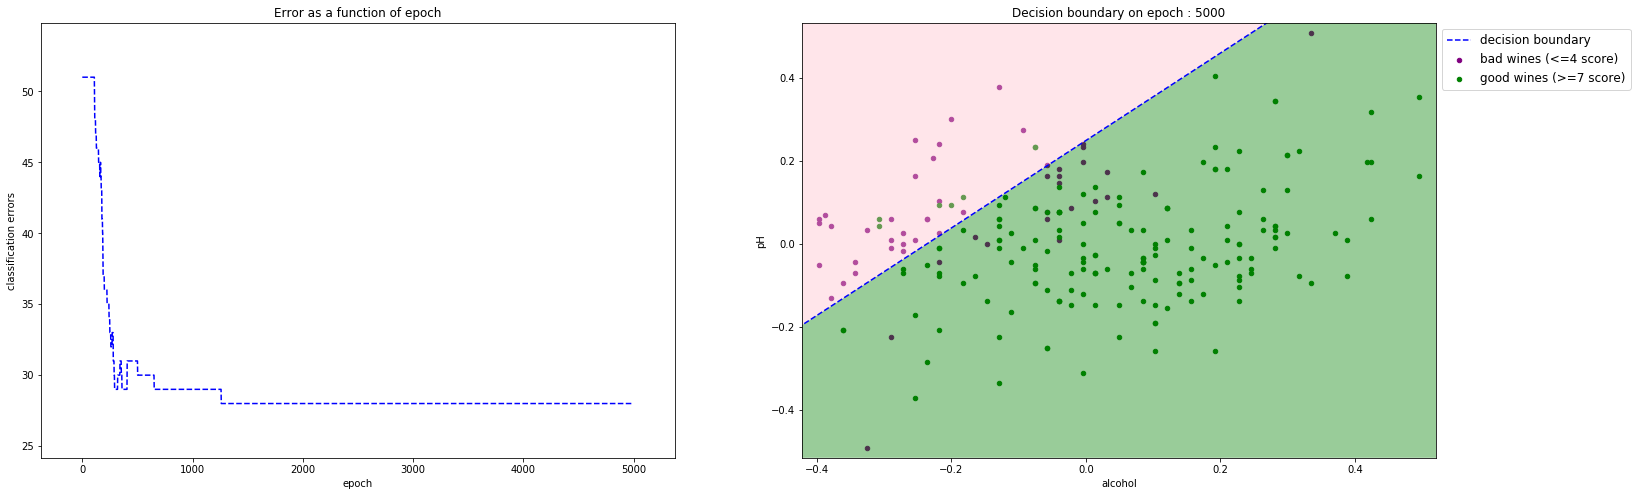

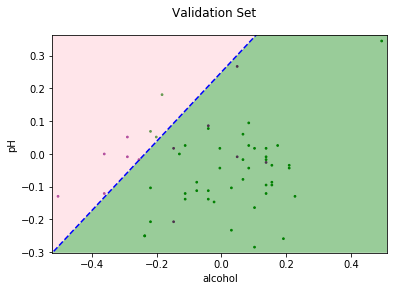

kFold Accuracy - Fold 0 : 85.71
kFold Accuracy - Fold 1 : 85.71
kFold Accuracy - Fold 2 : 83.93
kFold Accuracy - Fold 3 : 91.07
kFold Accuracy - Fold 4 : 83.93


In [34]:
train_performances = []
eval_data = []

def k_fold_evaluation(epoch, learning_rate):
    global train_performances
    global eval_data
    
    k = len(k_fold_red_wine)
    for i in range(k):
        fold_data = k_fold_red_wine[i]
        kfold_adaline = Adaline(fold_data[0][['pH', 'alcohol']], epoch, learning_rate, True)
        kfold_adaline.widrow_hoff_learning(fold_data[0]['Good'])

        kfold_train_results = kfold_adaline.performance[len(kfold_adaline.performance) - 1]
        plot_performance(kfold_adaline.performance, fold_data[0][['alcohol', 'pH', 'quality']], 7, 4, 0, False)
        validation_plot(kfold_train_results, fold_data[1], 7, 4)
        
        train_performances.append(kfold_train_results)
        eval_data.append(fold_data[1])

k_fold_evaluation(5000, 0.001)

for i in range(len(k_fold_red_wine)):
    kfold_accuracy = accuracy(train_performances[i], eval_data[i])
    print("kFold Accuracy - Fold %d : %.2f" % (i, kfold_accuracy))

**k-fold evaluation was run with constant epoch, but changing learning rate (and vice-versa).  However, only the k-fold for epoch = 5000 && learning_rate = 0.001 is shown above.**

**It seems that 


**Each fold has > 90% accuracy, and are precise within a 1-2% margin.**

**This means our Machine Learning model is consistent.  However, with additional techniques, the accuracy can be increased.**

**For a linear decision boundary, with a linear activation function, our ADALINE did a decent job at classification.**

## V.5 Adventures in the Nth dimension

### a) **Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.**

## b) Decision Boundary in N dimensions

**In 2D, in other words with a standard x-y Cartesian coordinate system, our decision boundary is a line.**

**Expanding our data to 3D, by analyzing an additional parameter (for example, looking at volatile acidity along with pH and alcohol), we will need to plot the points with a z-axis.**

**Our points would float in 3D space, and instead of a line, our decision boundary would be a hyperplane.**

**We can only observe up to three parameters, or 3D.  As such, there is no physical representation of higher dimensional spaces.**

# V.6 Marvin's rebuttal

**Now, we train with a (seemingly) more difficult dataset.**

**Instead of wine, we will look at the Pan-Galatic Gargle Baster data.**

**As usual, start with importing the CSV file, then plot a simple scatter to show the data.**

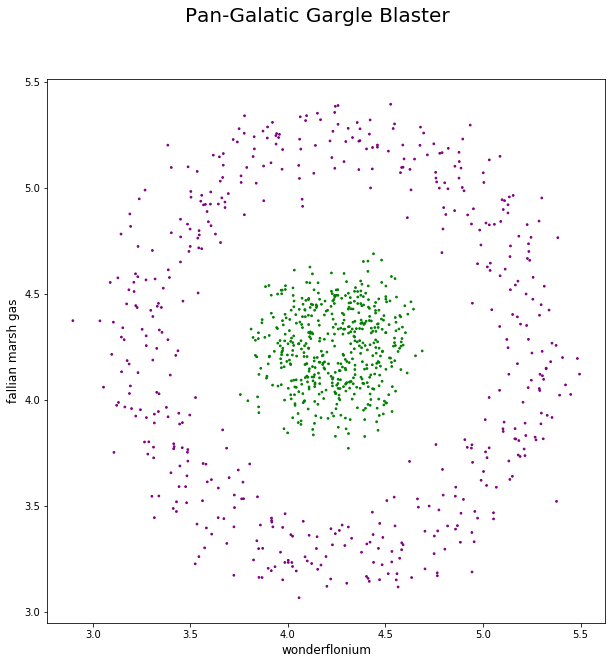

In [22]:
pan_gal_data = pd.read_csv("Pan Galactic Gargle Blaster.csv", delimiter = ';')

def pan_plot(pan_data, good_threshold, bad_threshold, x_axis, y_axis, save_plot=False):
    plt.figure(figsize=(10, 10))
    
    plt.xlabel(x_axis, fontsize=12)
    plt.ylabel(y_axis, fontsize=12)
    plt.suptitle('Pan-Galatic Gargle Blaster', fontsize=20)
    
    colors = ['green' if qlty >= good_threshold else 'purple' for qlty in pan_data['quality']]
    size = [3 if qlty >= good_threshold else 3 if qlty <= bad_threshold else 0 for qlty in pan_data['quality']]
    plt.scatter(pan_data[x_axis], pan_data[y_axis], s=size, c=colors)

    if save_plot:
        plt.savefig('pan_plot.png')

    plt.show()


pan_plot(pan_gal_data, 6, 5, 'wonderflonium', 'fallian marsh gas', False)

**The points are in clusters, which means that using an ADALINE or Perceptron model against this data directly would be very messy.**

**However, if we were to apply some kind of transformation (like we did with normalization), it might be possible to use our existing functions/classes for classification.**

**It seems we can draw a circular boundary that will separate the inner points from the outer ones.**

**Instead of using the data as is, we can transform it from Cartesian Coordinates to polar.**

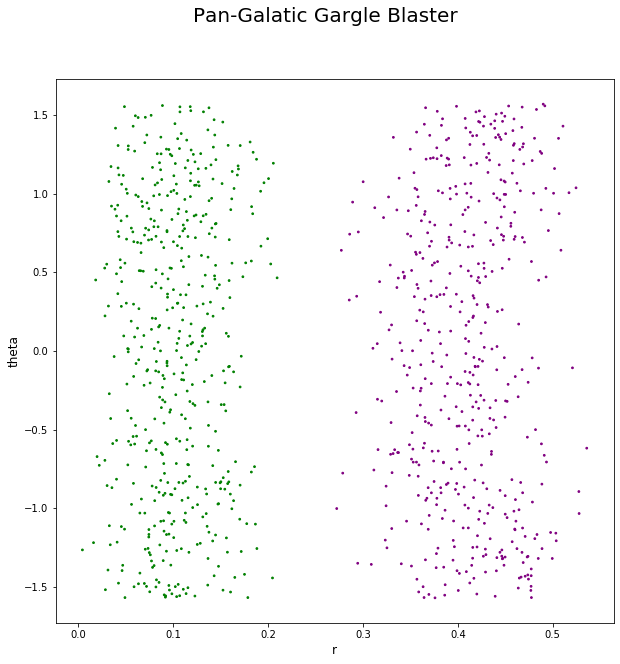

In [23]:
import math

def r(x, y):
    return math.sqrt(x*x + y*y)

def theta(x, y):
    return math.atan(y / x)

x_avg = average(pan_gal_data['wonderflonium'])
y_avg = average(pan_gal_data['fallian marsh gas'])

x_norm = [mean_normalization(x, pan_gal_data['wonderflonium'], x_avg) for x in pan_gal_data['wonderflonium']]
y_norm = [mean_normalization(y, pan_gal_data['fallian marsh gas'], y_avg) for y in pan_gal_data['fallian marsh gas']]

polar_pan_data = pan_gal_data.assign(r=x_norm)
polar_pan_data = polar_pan_data.assign(theta=y_norm)

r_vals = [r(x, y) for x, y in zip(polar_pan_data['r'], polar_pan_data['theta'])]
theta_vals = [theta(x, y) for x, y in zip(polar_pan_data['r'], polar_pan_data['theta'])]

polar_pan_data = polar_pan_data.assign(r=r_vals)
polar_pan_data = polar_pan_data.assign(theta=theta_vals)

pan_plot(polar_pan_data, 6, 5, 'r', 'theta', False)

**Our data is now (very) linearly separable.**

**Adding a quality column, then applying our ADALINE model to it...**

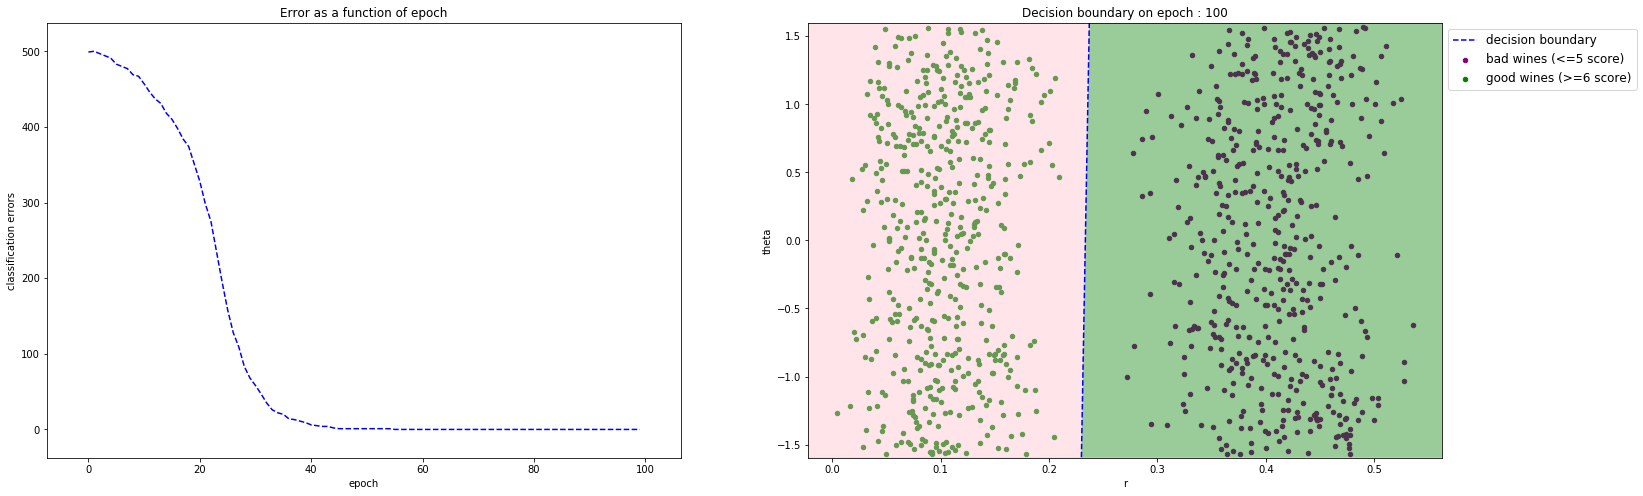

In [24]:
polar_pan_data = polar_pan_data.assign(Good=[1 if qlty >= 6 else -1 if qlty <= 5 else 0 for qlty in polar_pan_data['quality']])

pan_adaline = Adaline(polar_pan_data[['theta', 'r']], 100, 0.0001, True)
pan_adaline.widrow_hoff_learning(polar_pan_data['Good'])

plot_performance(pan_adaline.performance, polar_pan_data[['r', 'theta', 'quality']], 6, 5, 0, False)

**It takes about 40 or so epochs to reach a stable plateau, and the data is obviously separable.**